# Experiment with UNet Training

## Validate Test Sample

Look at the sampled test patch using balanced sampling methods. Make sure that input and label match.

In [26]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from torch.utils.data import DataLoader

from rattlinbog.sampling.sample_patches_from_dataset import sample_patches_from_dataset
from rattlinbog.th_extensions.utils.data.streamed_xarray_dataset import StreamedXArrayDataset
from rattlinbog.th_extensions.utils.dataset_splitters import split_to_params_and_labels

In [20]:
TEST_PATCH = Path("/home/braml/code/github/use-case-wetland-water-stress/tests/resources/approved/test_stochastic_training.test_stochastic_patch_samples_from_dataset.received.zarr")

In [21]:
test_patch = xr.open_zarr(TEST_PATCH)
test_patch

<xarray.Dataset>
Dimensions:      (y: 32, x: 32, parameter: 9)
Coordinates:
    band         int64 ...
  * parameter    (parameter) <U14 'SIG0-HPAR-C1' ... 'SIG0-HPAR-STD'
  * x            (x) float64 5.311e+06 5.311e+06 ... 5.311e+06 5.311e+06
  * y            (y) float64 1.65e+06 1.65e+06 1.65e+06 ... 1.649e+06 1.649e+06
Data variables:
    mask         (y, x) float32 dask.array<chunksize=(32, 32), meta=np.ndarray>
    params       (parameter, y, x) float32 dask.array<chunksize=(9, 32, 32), meta=np.ndarray>
    spatial_ref  int64 ...
Attributes:
    name:     sample_2

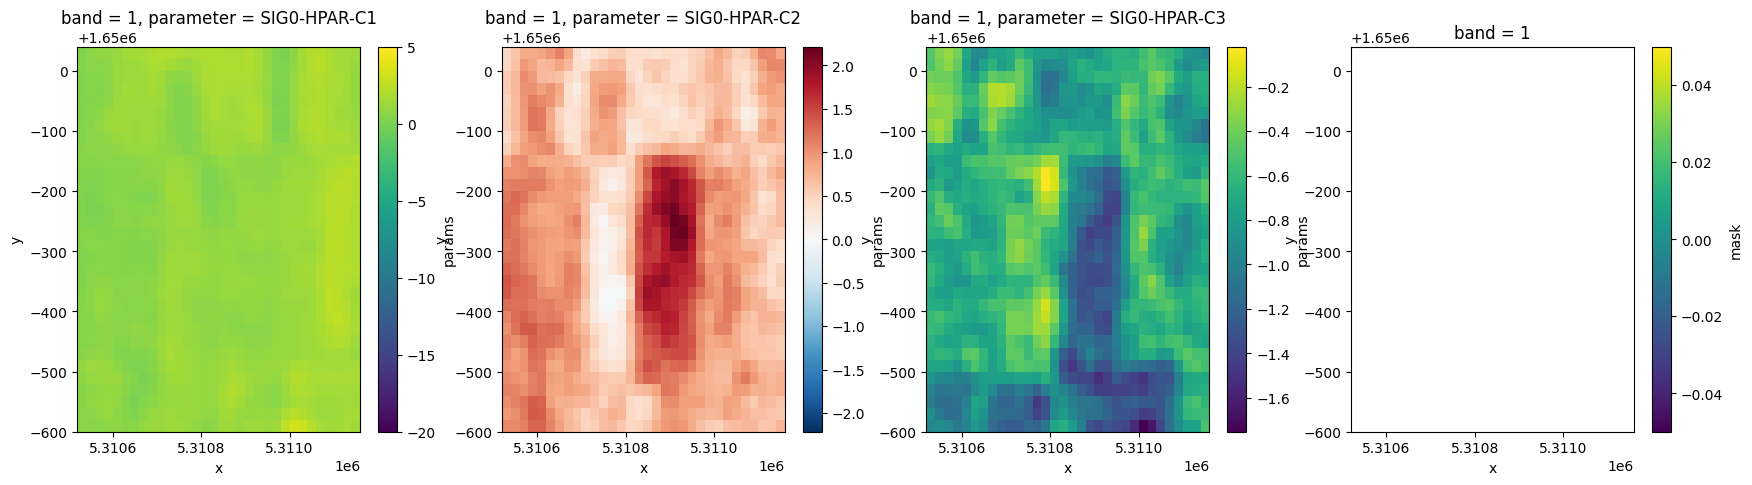

In [22]:
_, axes = plt.subplots(ncols=4, figsize=(21, 5))
test_patch['params'][0, ...].plot(ax=axes[0], vmin=-20, vmax=5)
test_patch['params'][1, ...].plot(ax=axes[1])
test_patch['params'][2, ...].plot(ax=axes[2])
test_patch['mask'].plot(ax=axes[3])
plt.draw()

## Test Data Loading

In [23]:
tile_ds = xr.open_zarr("/eodc/private/tuwgeo/users/braml/data/wetland/hparam/V1M0R1/EQUI7_EU020M/E051N015T3/SIG0-HPAR-MASK____RAMSAR-AT-01_E051N015T3_EU020M__.zarr")

In [30]:
array_stream = StreamedXArrayDataset(
    sample_patches_from_dataset(tile_ds, 64, 10000, np.random.default_rng(42)),
    split_to_params_and_labels)

patch_loader = DataLoader(array_stream, batch_size=8)

In [37]:
batch = next(iter(patch_loader))

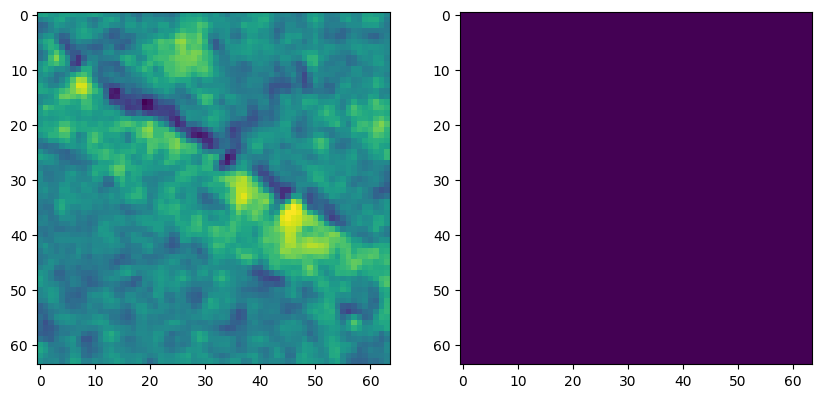

In [41]:
_, axes = plt.subplots(ncols=2, figsize=(10, 5))
params, label = batch
axes[0].imshow(params[1, 7])
axes[1].imshow(label[1])
plt.draw()